# FIT1043 Introduction to Data Science<br>Assignment 2
- Student Name: Ong Di Sheng
- Student ID: 31109667
- Tutorial Code: Lab 03
- Tutor: Ms Lee Mei Sin

## Introduction
In this assignment, we will be exposed to the use of machine learning in conducting predictive analytics on a given dataset, the split of dataset into training and testing set, as well as exploring multi-class classification using Support Vector Machine (SVM). At the end of this assignment, we need to submit a csv file (predictions made by our model) in Kaggle, which is a platform for our model evaluation by using Quadratic Weighted Kappa (QWK) measure. To complete this assignment, there is a number of steps needed to be followed in order to conduct multi-class classification on the given dataset by using Support Vector Machine (SVM). 

The steps are as follows:
1. Importing the necessary libraries
2. Reading and describing the file content
3. Supervised Learning
4. Data Normalisation
5. SVM Classification Model
6. Model Testing
7. Kaggle Submission Preparation

### Importing Libraries
Like other python libraries, we have to import before use. Also if we know which part of the library we need, it is more efficient to import the specific part rather than the whole library. 

In this assignment, we need to import the library __numpy__, which is a core library for scientific computing in Python as it provides a lot of supporting functions that make working with array very easy.

Furthermore, we need to import the library __pandas__, which is an open source data analysis tool for the python programming language. The purpose of importing this library is that we would like to use its associated functions such as reading from CSV files and so on.

Besides that, we also need to import the plotting framework __pyplot__ from the library __matplotlib__ in order to plot data in Python. For a better visualization purpose, we can also import the library __seaborn__ which provides a high-level interface for drawing attractive statistical graphics.

Moreover, we also need to import the library __scikit-learn__ as it provides us solid implementations of a range of machine learning algorithms, specifically SVM in this assignment.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score

Reminder: when using Python in a Jupyter Notebook, we need to add also the following <font color=red>___'magic line'___</font> to make sure that graphs are shown inline in the notebook.

In [2]:
%matplotlib inline

### Reading and describing the file content
Now, we can read the _DataFrame_ directly from the CSV file using the <font color=red>___"read_csv"___</font> command provided by the library __pandas__. 

In [3]:
# read csv file
essay_df = pd.read_csv('FIT1043-Essay-Features.csv')

The following cell is used to show that the datas are read correctly by printing out random five records from the file using the <font color=red>___"sample(5)"___</font> command.

In [4]:
# random five records from essay dataframe
essay_df.sample(5)

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
67,297,1759,348,15,9,0,5.054598,17,0,20.470588,341.988304,0.982725,122,0.350575,61,0.175287,452,447,3
1010,1645,2025,413,12,3,0,4.903148,24,0,17.208333,408.330057,0.988693,198,0.479419,112,0.271186,512,491,4
11,1515,2748,559,33,19,2,4.915921,21,1,26.619048,554.658258,0.992233,259,0.463327,132,0.236136,618,592,4
1327,1151,2404,467,16,10,0,5.147752,22,0,21.227273,462.987069,0.991407,200,0.428266,113,0.241970,529,519,4
796,121,3313,644,16,10,0,5.144410,22,0,29.272727,639.653167,0.993250,270,0.419255,162,0.251553,715,692,4


We can inspect the number of rows and columns in the essay dataframe using the <font color=red>___"shape"___</font> command.

In [5]:
# show number of rows and columns in the essay dataframe
essay_df.shape

(1332, 19)

Based on the output of the cell above, we can see that there are 1332 rows and 19 columns for the essay dataframe.

We can inspect the data types for each column in the essay dataframe using the <font color=red>___"dtypes"___</font> command.

In [6]:
# show the data types for each column in essay dataframe
essay_df.dtypes

essayid                        int64
chars                          int64
words                          int64
commas                         int64
apostrophes                    int64
punctuations                   int64
avg_word_length              float64
sentences                      int64
questions                      int64
avg_word_sentence            float64
POS                          float64
POS/total_words              float64
prompt_words                   int64
prompt_words/total_words     float64
synonym_words                  int64
synonym_words/total_words    float64
unstemmed                      int64
stemmed                        int64
score                          int64
dtype: object

Since all of the columns in the essay dataframe are of the correct data types, therefore we do not need to change their data types using the command provided by the library __pandas__.

Now, we need to check if there is any missing value in the essay dataframe using the <font color=red>___"isnull( ).sum( )"___</font> command provided by the library __pandas__.

In [7]:
# check if there is missing values in the essay dataframe
essay_df.isnull().sum()

essayid                      0
chars                        0
words                        0
commas                       0
apostrophes                  0
punctuations                 0
avg_word_length              0
sentences                    0
questions                    0
avg_word_sentence            0
POS                          0
POS/total_words              0
prompt_words                 0
prompt_words/total_words     0
synonym_words                0
synonym_words/total_words    0
unstemmed                    0
stemmed                      0
score                        0
dtype: int64

Since there is no missing values in this essay dataframe, therefore we do not need to wrangle any of the data.

Now, we need to check the unique scores in the 'score' column of the essay dataframe by using the <font color=red>___"unique"___</font> command. These unique scores are the classes that we want to classify our data into.

In [8]:
# show all the unique scores in the 'score' column of the essay dataframe
essay_df['score'].unique()

array([4, 3, 2, 1, 5, 6])

Based on the output of the cell above, we can see that there are 6 unique scores (classes) in which our data will be classified into.

Now, we can view some basic statistical details of the data in the essay dataframe using the <font color=red>___"describe"___</font> command.

In [9]:
# basic statistics of the values in the essay dataframe
essay_df.describe()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
count,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000
mean,905.27027,2101.745495,424.485736,14.667417,8.141141,0.47973,4.939762,19.704204,1.222973,23.884687,420.596542,0.989935,198.913664,0.469164,110.16967,0.263846,468.987988,455.507508,3.427177
std,526.68760,865.963750,171.873730,10.920781,6.124520,1.27168,0.231071,19.202731,1.847446,11.160020,170.985111,0.007308,82.729266,0.052466,43.96192,0.038870,159.447449,155.751220,0.774275
min,0.00000,169.000000,36.000000,0.000000,2.000000,0.00000,2.231322,0.000000,0.000000,1.084112,35.647059,0.924771,14.000000,0.288889,11.00000,0.027299,48.000000,50.000000,1.000000
25%,442.75000,1527.250000,310.000000,7.000000,4.000000,0.00000,4.791679,13.000000,0.000000,19.142857,305.406284,0.987758,144.000000,0.435709,81.00000,0.238423,361.000000,350.750000,3.000000
50%,914.50000,2029.500000,411.000000,13.000000,6.000000,0.00000,4.946059,18.000000,1.000000,22.030331,406.982869,0.991572,193.000000,0.465852,107.50000,0.262872,463.000000,448.000000,3.000000
75%,1369.75000,2613.500000,525.000000,21.000000,11.000000,0.00000,5.092938,24.000000,2.000000,26.048234,520.739458,0.994425,246.000000,0.500000,134.00000,0.288277,581.000000,561.250000,4.000000
max,1799.00000,6142.000000,1170.000000,72.000000,51.000000,26.00000,5.681429,642.000000,17.000000,303.000000,1158.984563,1.000000,669.000000,0.961207,355.00000,0.465517,750.000000,750.000000,6.000000


Statistical summary of some important data in the essay dataframe:
- chars: The standard deviation for chars is high (around 865.963750), which means that the chars datas are widely spread from the mean.	
- words: The minimum word count is only 36 whereas the maximum word count is 1170, which means that there is a huge difference in the writing skills among the students.
- POS: The median POS is around 406.982869, which is slightly less than the average POS (420.596542).
- unstemmed: On average, the number of unstemmed words is around 468.987988, which is slightly better than the median (463)
- stemmed: The standard deviation for the number of stemmed words is high (around 155.751220), which means that the stemmed datas are widely spread from the mean.
- score: The average score is around 3.427177.

In order to have a better visualization of the correlation between the features in the essay dataframe, we can first find the correlation values between features using the <font color=red>___"corr( )"___</font> command provided by the library __pandas__ and then plot the following heatmap by using the command provided by the library __matplotlib__ and __seaborn__.

<AxesSubplot:title={'center':'Correlation between features'}>

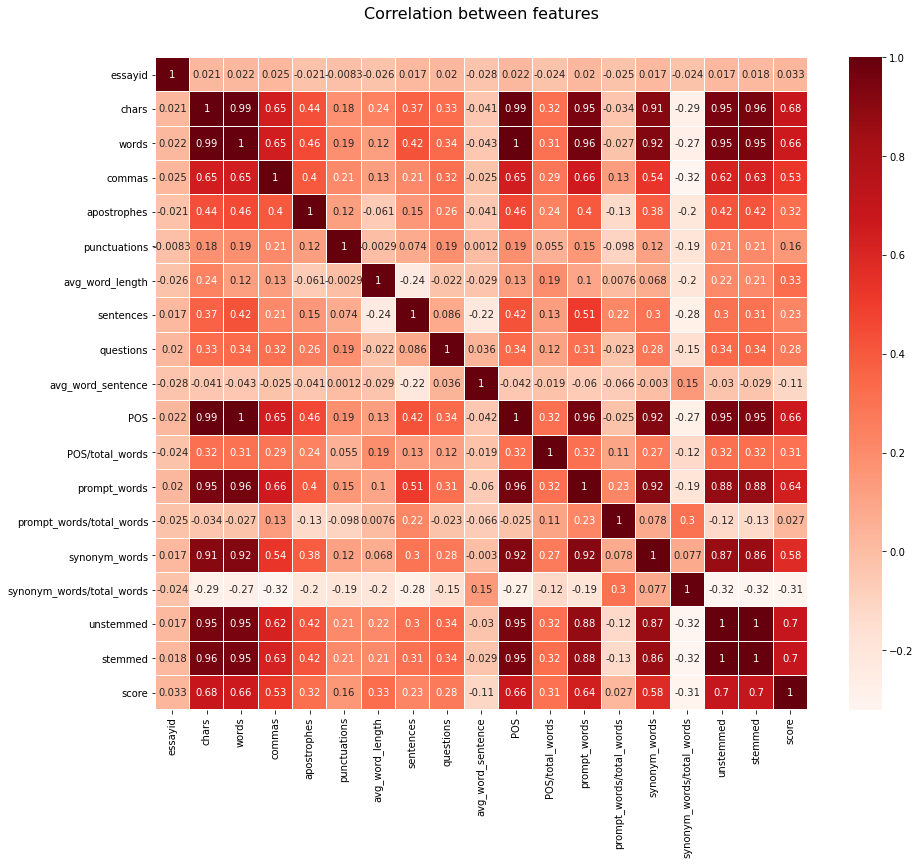

In [10]:
# plot correlation heatmap
plt.figure(figsize=(15,12))
plt.title('Correlation between features', y=1.05, size=16)
sns.heatmap(essay_df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap='Reds', linecolor='white', annot=True)

Based on the heatmap above, we can see that there is a high positive correlation (> 0.6) between our target score and:
- chars
- words 
- POS
- prompt_words
- unstemmed
- stemmed

All of these make sense as when the number of characters, words, POS, prompt words, unstemmed and stemmed words increase, this shows that the student has a good vocabulary skills, which in turn will lead to a better essay score.

### Supervised Learning
Before we proceed to the coding part, we need to first know what supervised machine learning, labelled data, and the training and test datasets actually are.

<font color=blue>___Explain___</font> __supervised machine learning, the notion of labelled data, and the training and test datasets:__

a) __Notion of labelled data__

Labelled data is a data which is associated and tagged with the correct answer, i.e. score in this case (Rungta, 2021). In this assignment, since we are trying to predict the score values based on the information on the essays (chars, words, etc.), therefore the 'score' in the given dataset would be our label.

b) __Supervised machine learning__

The machine is trained by using those labelled data and the algorithms learn to predict the output based on the given input data (Brownlee, 2016). In other words, the supervised learning algorithm learns from the labelled training data, which will in turn helps us to predict the outcomes for unforeseen data or test data. The ultimate goal of supervised machine learning is to approximate the mapping function, so that when there is a new input data (x), the output variable (y) for that data can be predicted accurately.

c) __Training and test datasets__

Before we perform any supervised machine learning, we need to first divide the given dataset into two subsets. The first subset (train dataset) is used to fit the model. The second subset (test dataset) is used to estimate the performance of the machine learning model on new data (data not used to train the model). In other words, the input element of the test dataset is provided to the model, then the predictions made by the model are compared to the expected values in the test dataset. In summary:

- Train dataset: used to train a model
- Test dataset: used to evaluate the fitted model

Now, we proceed to split the dataset into input data and their corresponding labelled data. The first 18 columns are the input data, i.e. the 'essayid', 'chars', 'words', etc of which we would like to predict the essay 'score' of the students. Let’s split the data into X, the input data and y, the labelled data.

In [11]:
# split of the features and labels

# input data: essayid, chars, words, etc. (exclude 'score' column)
X = essay_df.iloc[:, 0:18].values 

# labelled data: score
y = essay_df.iloc[:, 18].values 

Now, we need to split the given dataset for training and testing by keeping 80% of the dataset for the training data and the remaining 20% for the testing data using the function <font color=red>___"train_test_split( )"___</font> from the library __sklearn.model_selection__.

In [12]:
# split of the test and train dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

Before we proceed to the data normalisation part, we also need to understand and able to differentitate between binary and multi-class classification.

<font color=blue>___Explain___</font> __binary and multi-class classification:__

In binary classification, each training point belongs to one of two different classes, whereas in multi-class classification, each training point belongs to one of N different classes, where N > 2. In both binary and multi-class classification, the goal is the same, that is to construct a function which, given a new data point, will correctly predict the class to which the new point belongs. To put it simply, binary classification will only assign the examples into exactly one of two classes, e.g. 0/1 or True/False, whereas multi-class classification will assign the examples into exactly one of more than two classes, e.g. 0/1/2 or 'Cat'/'Dog'/'Lion' (Brownlee, 2020). 

Besides that, we can also differentiate between binary and multi-class classification through the use of confusion matrix (will be discussed in 'Model Testing' section). This is because the dimensions of confusion matrix for binary and multi-class classification are 2 by 2 and N by N respectively, where N > 2. In this assignment, we will be performing multi-class classification as we have 6 different classes (score - 1,2,3,4,5,6) that we need to classify into.

### Data Normalisation
Before building our SVM model, we need to understand that there is a need for us to normalise or scale our data due to the following reasons:

<font color=blue>___Explain___</font> __the purpose of normalised / scaling of data:__

According to Saini (2019), most of the machine learning algorithms won't work well without feature scaling or normalisation as the range of values in our dataset usually varies widely. In this assignment, there is a wide range of values for the 'chars' feature as their standard deviation is quite high (around 865.963750), which can be seen on the statistical table above. This wide range of values will cause a problem to the machine learning algorithms as they use Euclidean distance between two data points in their computations. If one of the features has a broad range of values, the distance will be heavily influenced by this particular feature. Besides that, the features with high magnitudes will also weigh in a lot more in the Euclidean calculations than the features with low magnitudes. In order to overcome this issue, normalisation or scaling of data need to be done so that all features can be brought to the same level of magnitude and thus contributing proportionately to the final Euclidean distance.

Now, we can scale our data by using built in function <font color=red>___"StandardScaler( )"___</font> from the library __sklearn.preprocessing__. Note that we apply the <font color=red>___"fit_transform( )"___</font> to the training dataset and not the test dataset. The reason is that we want to scale it to have a mean of 0 and a certain standard deviation. The mean and standard deviation values will be stored in the <font color=red>___"StandardScaler( )"___</font> and applied to the testing dataset using the <font color=red>___"transform( )"___</font>.

In [13]:
# feature scaling
sc = StandardScaler()

# standardize training and testing data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### SVM Classification Model
Before we proceed to the actual coding part, we first need to understand what SVM and the kernel in SVM actually are.

<font color=blue>___Explain___</font> __SVM (in relation to Linear Regression):__

According to Navlani (2019), <font color=red>___Support Vector Machines (SVM)___</font> is a supervised machine learning algorithm, mostly used as a classification approach, but it can actually be employed in both types of classification and regression problems, <font color=red>___as opposed to Linear Regression___</font> which can only perform a regression task. <font color=red>___SVM___</font> constructs a hyperplane in n-dimensional space (where n is the number of features we have) to separate different classes. The core idea of <font color=red>___SVM___</font> is to find a maximum marginal hyperplane that segregates the given dataset in the best possible way into classes whereas <font color=red>___Linear Regression___</font> is mostly used for finding out the relationship between variables and predict a dependent variable value (y) based on a given independent variable (x). Since we are dealing with classification problem in this assignment, therefore we will be <font color=red>___using SVM instead of Linear Regression___</font> in this particular task.

<font color=blue>___Explain___</font> __the kernel in SVM:__

According to Navlani (2019), the SVM algorithm is implemented using a kernel, which takes data as input and transform it into the required form. The kernel in SVM is extremely useful in non-linear separation problem as it is able to convert a non-separable problem into a separable problem by transforming the low-dimensional input space into a higher dimensional space. There are different types of kernel functions available for SVM such as linear, polynomial, radial basis function (RBF) and sigmoid. Therefore, a more accurate SVM model can be built if we have a good knowledge of the kernel. In this assignment, since we do not have any prior knowledge of our data, therefore we will be using Radial Basis Function (RBF) kernel in our SVM model as it helps us to make proper separation of data, specifically non-linear data.

Now, it's time for us to build our SVM model. The following cells are used to show SVM model building code.

In [14]:
# default model (without hyperparameter tuning)
svm_model = SVC()

# fit the SVM model using training data
svm_model.fit(X_train, y_train)

# perform classification on samples in X_test
y_pred = svm_model.predict(X_test)

# text report showing the main classification metrics (accuracy, precision, recall, f1-score)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.69      0.41      0.51        22
           3       0.66      0.77      0.71       112
           4       0.70      0.73      0.71       117
           5       1.00      0.17      0.29        12
           6       0.00      0.00      0.00         1

    accuracy                           0.68       267
   macro avg       0.51      0.35      0.37       267
weighted avg       0.68      0.68      0.67       267



/Users/ongtengleong/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ongtengleong/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ongtengleong/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Based on the classification report above, our first SVM model gets around 0.68, 0.51, 0.35 and 0.37 for test accuracy, macro average precision, recall and f1-score respectively. Note that: these scores are just a reference to see how well our model performs currently, in actual, we will be using QWK measure (will be discussed in the next section) to evaluate the performance of our model. To further improve these scores, we can try using the hyperparameter tuning technique when we build our SVM model.

After several trials and errors, the following tuning hyperparameters are found to be giving us a better score in terms of accuracy, precision and recall:

- Regularization/Penalty parameter, C = 1
    - A small value of C (1) is chosen so that planes that separate the points well will be found, even if there are some misclassifications.
- kernel = 'rbf'
    - RBF kernel is chosen as it is able to compute the separation line in the higher dimension, which is useful for non-linear hyperplane.
- gamma = 0.01
    - A lower value of gamma (0.01) will only fit the training dataset loosely without causing over-fitting issues. This is because a low value of gamma only considers nearby points in calculating the separation line.
- class_weight = {1:4.25,2:0.65,3:0.285,4:0.27,5:0.85,6:10}
    - Since our datasets are quite imbalanced as there are less data for class 1 and 6 as compared to other classes, therefore the class_weight argument needs to be provided as a model hyperparameter in order to give more importance to certain classes such as class 1 and 6 in this assignment. 

In [15]:
# current best SVM model (with hyperparameter tuning)
final_svm_model = SVC(class_weight={1:4.25,2:0.65,3:0.285,4:0.27,5:0.85,6:10}, C=1, decision_function_shape='ovo', \
                      gamma=0.01, kernel='rbf')

# fit the current best SVM model using training data
final_svm_model.fit(X_train, y_train)

# perform classification on samples in X_test
y_pred = final_svm_model.predict(X_test)

# text report showing the main classification metrics (accuracy, precision, recall, f1-score)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.23      1.00      0.38         3
           2       0.64      0.32      0.42        22
           3       0.70      0.79      0.74       112
           4       0.75      0.70      0.73       117
           5       0.80      0.33      0.47        12
           6       0.00      0.00      0.00         1

    accuracy                           0.69       267
   macro avg       0.52      0.52      0.46       267
weighted avg       0.71      0.69      0.69       267



Based on the classification report above, we can see that there is a slight improvement for test accuracy, macro average precision, recall and f1-score after hyperparameter tuning. Therefore, this SVM model with hyperparameter tuning will be used to predict the scores for Kaggle submission. As mentioned earlier, these scores just act as a reference for the performance of our model currently. Instead, QWK score (to be explained in the next section) will be used to reflect our SVM model performance.

### Model Testing
Since we now have a model built, let’s test how well our model is. To do so, we need to use the built model to predict the testing input data, X_test by using the method <font color=red>___"predict( )"___</font> in the model (note that the output should be integer values).

In [16]:
#  predict the test set results
y_pred = final_svm_model.predict(X_test)

y_pred

array([3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 2, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3,
       4, 4, 3, 4, 4, 2, 4, 3, 4, 4, 3, 5, 1, 1, 4, 4, 4, 4, 3, 3, 4, 1,
       3, 3, 4, 4, 6, 4, 3, 3, 3, 4, 3, 1, 3, 4, 4, 3, 2, 3, 4, 4, 4, 3,
       4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 3, 3, 3, 3, 1, 3, 4, 3, 4, 4, 4, 4,
       4, 4, 3, 3, 3, 3, 6, 4, 3, 3, 4, 2, 3, 2, 3, 3, 3, 3, 4, 3, 1, 4,
       4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 4, 1, 4, 3, 3, 5, 5, 4, 5, 4, 4, 2,
       1, 4, 3, 3, 4, 4, 3, 3, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 3,
       4, 1, 4, 3, 3, 3, 4, 4, 4, 4, 3, 3, 1, 4, 3, 3, 2, 3, 1, 3, 3, 4,
       1, 3, 3, 4, 4, 4, 3, 2, 3, 3, 3, 2, 3, 6, 4, 3, 3, 3, 4, 3, 3, 3,
       3, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 4, 4, 4, 3, 4, 4,
       3, 4, 1, 3, 3, 4, 4, 3, 3, 4, 4, 3, 4, 4, 5, 3, 4, 4, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 2, 4, 3, 3, 4, 4,
       4, 3, 3])

We now have a set of labels, y_pred, that is the output from the prediction of using our testing data. We now need to compare this y_pred with the actual y_test (the true value) and evaluate the performance of our model’s prediction. To do so, we want to view it using a confusion matrix. 

__Code, output and explain the confusion matrix:__

[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '6')]

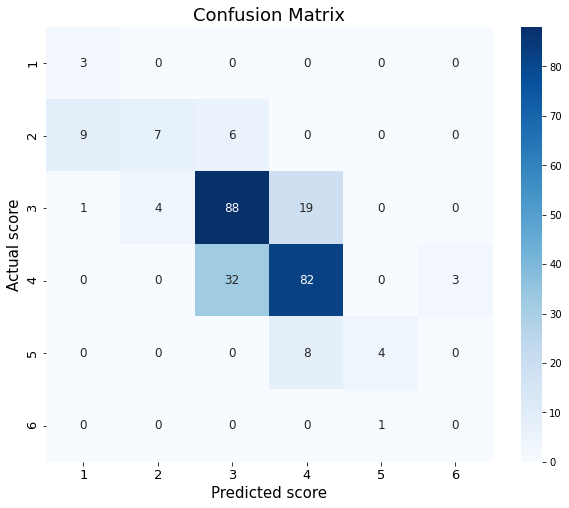

In [17]:
# compute confusion matrix to evaluate the performance of our model
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure(figsize=(10,8))
ax = plt.subplot()
sns.heatmap(cm, cmap='Blues', annot=True, annot_kws={"size": 12}, ax=ax)

# set labels, title and ticks
ax.set_xlabel('Predicted score', fontsize=15)
ax.set_ylabel('Actual score', fontsize=15)
ax.set_title('Confusion Matrix', fontsize=18)
score_labels = [1, 2, 3, 4, 5, 6]
ax.xaxis.set_ticklabels(score_labels, fontsize=13)
ax.yaxis.set_ticklabels(score_labels, fontsize=13)

Confusion matrix is used to summarize the number of correct and incorrect predictions for a classification problem by using count values, which are broken down by each class. In general, there are 4 basic terms being used in confusion matrix:

- True Positive: predict event values correctly
- False Positive: predict event values incorrectly
- True Negative: predict no-event values correctly
- False Negative: predict no-event values incorrectly

Based on the diagram above, we can see that our confusion matrix is shown as a 6 by 6 matrix. This is because we have 6 classes (score 1,2,3,4,5,6) to be classified into in this assignment. From the confusion matrix output, the values of True Positive for each class are organized in a diagonal line from top-left to bottom-right of the matrix. We can observe that the numbers of True Positive for class 3 and 4 are quite high as compared to other classes. Besides that, 
we can also observe that the number of False Negative (9+6=15) is higher than the True Positive (7) for class 2. Therefore, this means that our SVM model can still be further improved to better classify the score values. 

Before we proceed to the next part, we need to first understand what QWK score actually is.

<font color=blue>___Explain___</font> __QWK:__

According to Arora (2018), QWK is a metric which is used to calculate the amount of similarity between predictions, y_pred and actuals, y_test. A perfect score of 1.0 is granted when both the predictions and actuals are the same whereas the least possible score of -1 is given when the predictions are totally different from actuals. In this assignment, we might get a QWK score of -1 if all actuals are 1's but all predictions are 6's. The goal is to make our QWK score as close to 1 as possible. Generally a score of 0.6 and above is considered to be a really good score.

__Code, output and explain the QWK score:__

In [18]:
# compute QWK score by using cohen_kappa_score function and set weights to 'quadratic'
qwk_score = cohen_kappa_score(y_test, y_pred, weights='quadratic')

print('QWK score:', qwk_score)

QWK score: 0.726955660570309


My SVM model achieves a QWK score of 0.726955660570309, which is considered to be an above average score. This also means that the actual, y_test and predicted values, y_pred have very good and substantial agreement. 

### Kaggle Submission Preparation
In preparation for Kaggle submission, we first need to read the competition data file and do the prediction.

In [19]:
# read competition data file
kaggle_df = pd.read_csv('FIT1043-Essay-Features-Submission.csv')

# input data: essayid, chars, words, etc. (without 'score' column)
X_kaggle = kaggle_df.iloc[:, 0:18].values 

# standardize kaggle testing data
X_kaggle = sc.transform(X_kaggle)

# do the prediction
y_kaggle = final_svm_model.predict(X_kaggle)

Now, we need to output our predictions to the right CSV format.

In [20]:
# select only 'essayid' column
X_kaggle = kaggle_df['essayid']

# create dataframe with two columns ('essayid' and 'score')
kaggle_submission_df = pd.DataFrame({'essayid': X_kaggle, 'score': y_kaggle})

# export predictions to a CSV file
kaggle_submission_df.to_csv('31109667-OngDiSheng-V24.csv', index=False, header=True)

## Conclusion
In summary, I have learnt how to conduct predictive analytics through machine learning on a dataset using Python in the Jupyter Notebook environment upon the completion of this assignment. Most importantly, I have also learnt how to conduct multi-class classification using Support Vector Machine (SVM) and communicate the output of the analysis using Quadratic Weighted Kappa (QWK) measure. Throughout the entire process, I have encountered some difficulties on hyperparameter tuning where there are some errors with my code. However, this issue has been resolved successfully after searching online for any related information. 

## References
Arora, A. (2018, December 30). Quadratic Kappa Metric explained in 5 simple steps. Kaggle. Retrieved from https://www.kaggle.com/aroraaman/quadratic-kappa-metric-explained-in-5-simple-steps/comments

Brownlee, J. (2020, August 20). Supervised and Unsupervised Machine Learning Algorithms. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/

Brownlee, J. (2020b, September 7). One-vs-Rest and One-vs-One for Multi-Class Classification. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/#:%7E:text=Binary%20classification%20are%20those%20tasks,of%20more%20than%20two%20classes.

Navlani, A. (2019, December 28). Support Vector Machines with Scikit-learn. DataCamp. Retrieved from https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

Rungta, K. (2021, April 3). Supervised Machine Learning: What is, Algorithms, Example. Guru99. Retrieved from https://www.guru99.com/supervised-machine-learning.html

Saini, R. (2019, October 23). Feature Scaling- Why it is required? - Rahul Saini. Medium. Retrieved from https://medium.com/@rahul77349/feature-scaling-why-it-is-required-8a93df1af310